<a href="https://colab.research.google.com/github/DeveloperSeJin/Algorithms-in-Python/blob/main/Natural_Language_Processing_with_Disaster_Tweets_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('./train.csv')
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [13]:
data.drop(columns = 'location', inplace = True)

In [14]:
def combine_2rd_columns(col_1, col_2):
    result = col_1
    if not pd.isna(col_2):
        result += " " + str(col_2)
    return result

In [15]:
data['text'] = data.apply(lambda x : combine_2rd_columns(x['text'], x['keyword']), axis = 1)

In [17]:
data.drop(columns = 'keyword', inplace = True)
data

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [18]:
data.drop(columns = 'id', inplace = True)
data

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [19]:
!pip install autocorrect
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from autocorrect import Speller
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=d5de4d54a99b0212edbfd6a1456c5f4db214d224f2bb86305993da97ccbc072e
  Stored in directory: /root/.cache/pip/wheels/ab/0f/23/3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
import re

In [21]:
from nltk.stem import WordNetLemmatizer

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
lemmatizer = WordNetLemmatizer()

data['cleaned_text'] = data['text'].apply(\
                               lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
                               for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))]))

data.head()

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,our deed are the reason of this earthquake may...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all resident asked to shelter in place are bei...
3,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive wildfire evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska a sm...


In [25]:
tfidf_model = TfidfVectorizer(max_features = 500)

tfidf_df = pd.DataFrame(tfidf_model.fit_transform(data['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)

tfidf_df.head()

,08,10,11,15,2015,20disaster,20emergency,20fire,20fires,20storm,...,wreck,wreckage,wrecked,year,you,your,youtube,ûª,ûªs,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_test = pd.read_csv('./test.csv')
X_test['text'] = X_test.apply(lambda x : combine_2rd_columns(x['text'], x['keyword']), axis = 1)
X_test.drop(columns = 'location', inplace = True)
X_test.drop(columns = 'id', inplace = True)
X_test.drop(columns = 'keyword', inplace = True)
X_test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [33]:
X_test['cleaned_text'] = X_test['text'].apply(\
                               lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
                               for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))]))

X_test.head()

,text,cleaned_text
0,Just happened a terrible car crash,just happened a terrible car crash
1,"Heard about #earthquake is different cities, s...",heard about earthquake is different city stay ...
2,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond goose are ...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 in china and taiwan


In [34]:
tfidf_df_test = pd.DataFrame(tfidf_model.fit_transform(X_test['cleaned_text']).todense())
tfidf_df_test.columns = sorted(tfidf_model.vocabulary_)

tfidf_df_test.head()

,00,10,11,15,2015,20bomber,20disaster,20fire,20fires,20responders,...,wounded,wreck,wreckage,wrecked,year,you,your,youtube,ûªs,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(tfidf_df, data['target'], test_size = 0.2, random_state = 123)
display(X_train.shape)
display(X_val.shape)

(6090, 500)

(1523, 500)

In [43]:
Y_val.to_numpy()

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators = 20, learning_rate = 0.03, max_depth = 5, subsample = 0.6, colsample_bytree = 0.6, reg_alpha = 10, seed = 42)
model = xgbc.fit(X_train, Y_train)
predicted_values = model.predict(X_val)

#data['predicted_labels_xgbc'] = predicted_values
predicted_values

#data[['predicted_labels_xgbc', 'target']].head(20)

array([0, 1, 0, ..., 1, 0, 1])

In [46]:
predicted_values.shape

(1523,)

In [55]:
confusion_matrix(Y_val, predicted_values)

array([[685, 194],
       [304, 340]])

<Axes: >

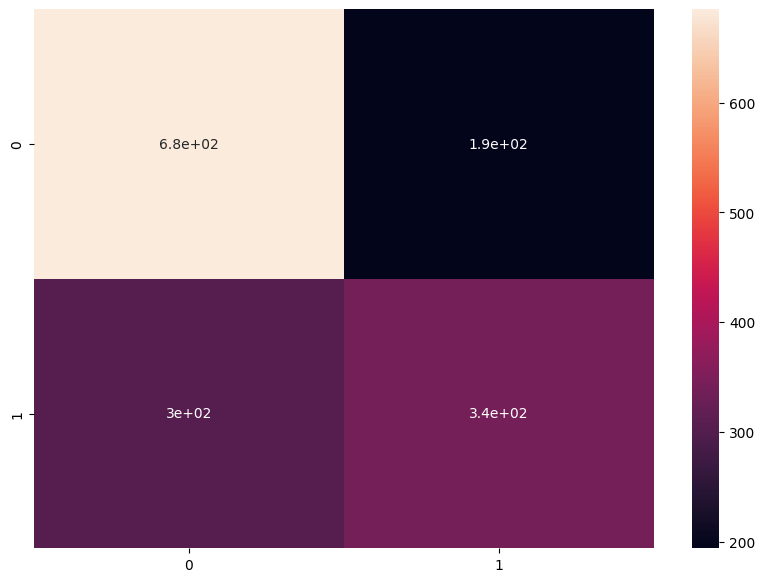

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 7))
sns.heatmap(pd.DataFrame(confusion_matrix(Y_val, predicted_values), index = [0, 1], columns = [0, 1]), annot = True)

In [44]:
mse = np.sqrt(predicted_values - Y_val.to_numpy()).sum() / len(predicted_values)
mse

<ipython-input-44-8501e19295fd>:1: RuntimeWarning: invalid value encountered in sqrt
  mse = np.sqrt(predicted_values - Y_val.to_numpy()).sum() / len(predicted_values)


nan